In [1]:
import os
import numpy as np
import scipy.io as sio
import matplotlib
import matplotlib.pyplot as plt
from numpy.matlib import repmat
from sklearn.preprocessing import normalize
from PIL import Image

In [2]:
def viewcolumn(columnvector):
    # viewcolumn(columnvector);
    # VIEWCOLUMN Displays a 60 x 60 grayscale image stored in a column vector.
    # Tim Marks 2002
    plt.imshow(columnvector.reshape([60, 60], order='F'), cmap=plt.get_cmap('gray'))

def normc(Mat):
    # normc(M) normalizes the columns of M to a length of 1.
    return normalize(Mat, norm='l2', axis=0)

def eigsort(V, eigvals):
    # [Vsort,Dsort] = eigsort(V, eigvals)
    #
    # Sorts a matrix eigenvectors and a array of eigenvalues in order
    # of eigenvalue size, largest eigenvalue first and smallest eigenvalue
    # last.
    #
    # Example usage:
    # di, V = np.linarg.eig(L)
    # Vnew, Dnew = eigsort(V, di)
    #
    # Tim Marks 2002

    # Sort the eigenvalues from largest to smallest. Store the sorted
    # eigenvalues in the column vector lambd.
    lohival = np.sort(eigvals)
    lohiindex = np.argsort(eigvals)
    lambd = np.flip(lohival)
    index = np.flip(lohiindex)
    Dsort = np.diag(lambd)

    # Sort eigenvectors to correspond to the ordered eigenvalues. Store sorted
    # eigenvectors as columns of the matrix vsort.
    M = np.size(lambd)
    Vsort = np.zeros((M, M))
    for i in range(M):
        Vsort[:,i] = V[:,index[i]]
    return Vsort, Dsort


In [8]:
image_matrix = sio.loadmat('bee_images_60x60.mat')
animal = image_matrix['allImagesFlattened']


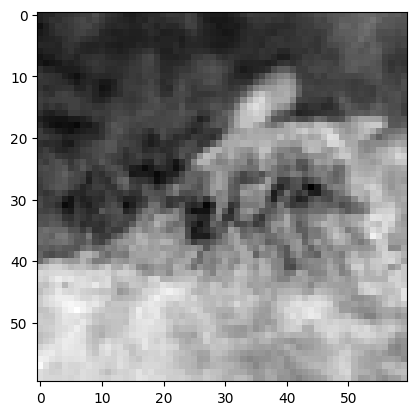

In [9]:
#Find the mean face
meananimal = np.mean(animal, axis = 1)
meananimal = meananimal[:, np.newaxis] #Transform the returned 1D numpy array to a 2D numpy column vector
mean_repeated = np.matlib.repmat(meananimal, 1, animal.shape[1])
# Subtract mean from all columns
A = animal - mean_repeated

#Find the covariance matrix
w = A.T @ A
#Find the eigenvalues and eigenvectors
eigvals, V_old = np.linalg.eig(w)
#Sort them by descending eigenvalues
V, D = eigsort(V_old, eigvals)

U = A @ V
U = normc(U)
animal3 = animal[:, 3][:, np.newaxis]
Z = animal3 - meananimal
#project the image onto the principal components
c = U.T @ Z

#modified components
c_mod = c.copy()

# remove principal components 12 through 17
c_mod[12:17, :] = 0



# reconstruct
Zhat_mod = U @ c_mod + meananimal



viewcolumn(Zhat_mod)


In [10]:
image = animal[:, 3]
img_array = Zhat_mod.reshape((60, 60), order='F')
if img_array.max() <= 1.0:
    img_array_uint8 = (img_array * 255).astype(np.uint8)
else:
    img_array_uint8 = img_array.astype(np.uint8)

img_pil = Image.fromarray(img_array_uint8, mode = 'L')
img_pil.save("bee3_12_17_.jpg")

/tmp/ipython-input-1232164154.py:8: DeprecationWarning: 'mode' parameter is deprecated and will be removed in Pillow 13 (2026-10-15)
  img_pil = Image.fromarray(img_array_uint8, mode = 'L')
